# 03: Explorative Data Analysis

## PCA

### Curse of Dimensionality

> 1. Look at the plot below. What does this mean for the pairwise distances between the points in high dimensions?
> 2. Why does this make the analysis of high-dimensional data hard?

1. 
2. 

0.0004814912056392099 1.3549815721763787
0.060373293607655046 1.8828039953633176
0.2391167393583607 2.3737131810339833
0.7416269260897808 2.967940032829332
1.7092175799028861 4.033585035919475
2.91177705642687 5.10451158846987


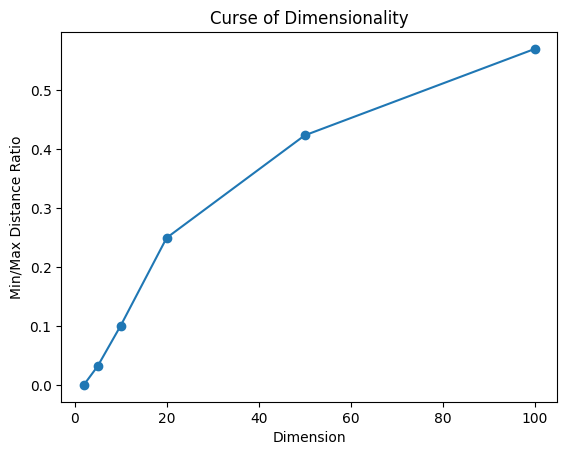

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def min_max_ratio(points):
    # Compute pairwise distances
    dists = np.array([np.linalg.norm(p1 - p2) for p1, p2 in itertools.combinations(points, 2)])
    print(dists.min(), dists.max())
    return dists.min() / dists.max()

dims = [2, 5, 10, 20, 50, 100]
ratios = []

for d in dims:
    points = np.random.rand(1000, d)
    ratios.append(min_max_ratio(points))

plt.plot(dims, ratios, marker='o')
plt.xlabel('Dimension')
plt.ylabel('Min/Max Distance Ratio')
plt.title('Curse of Dimensionality')
plt.show()

### Variance as Information

We randomly generate some data points first.

/tmp/ipykernel_115979/3942301793.py:3: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X = np.random.multivariate_normal(mean=[0, 0],


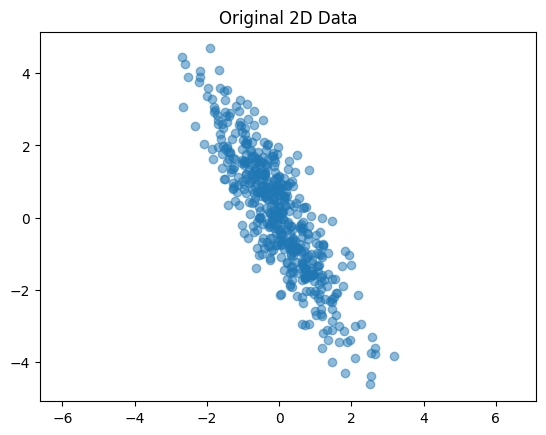

In [37]:
# Generate 2D Gaussian blob
np.random.seed(0)
X = np.random.multivariate_normal(mean=[0, 0],
                                  cov=[[-1, 1.5],
                                       [1.5, -3]],
                                  size=500)

plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.axis('equal')
plt.title("Original 2D Data")
plt.show()

> 3. Complete the code of the projection function below!
> 4. Plot the projected points for a couple of different angles!

In [31]:
# Compute variance along a projection axis
def projected_variance(X, theta):
    # Projection direction (unit vector) rotated by theta
    w = np.array([np.cos(theta), np.sin(theta)])
    X_proj = ?  # TODO: 3. fill in implementation where the question mark is
    return X_proj.var()

thetas = np.linspace(0, np.pi, 180)
vars_ = [projected_variance(X, t) for t in thetas]

plt.plot(np.degrees(thetas), vars_)
plt.xlabel('Projection Angle (degrees)')
plt.ylabel('Projected Variance')
plt.title('Variance Along Different Directions')
plt.show()

SyntaxError: invalid syntax (3587185940.py, line 5)

> 5. What is preferable about projections with higher variance? (E.g. for learning tasks or data visualization)

5. 

### Building PCA

> 6. Figure out what to do to the Eigenvector / Eigenvalue lists to complete the PCA implementation below and implement that change!

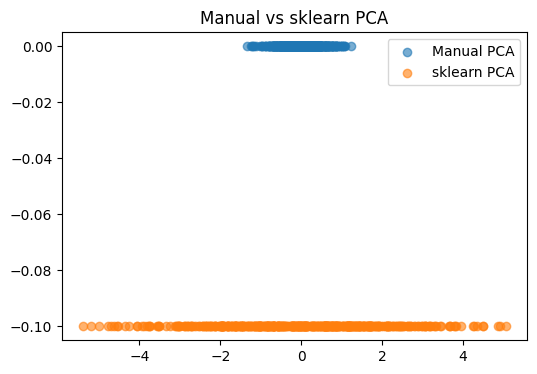

In [38]:
from numpy.linalg import eig
from sklearn.decomposition import PCA

# Center data
X_centered = X - X.mean(axis=0)

# Covariance matrix
C = np.cov(X_centered, rowvar=False)

# Eigen decomposition
vals, vecs = eig(C)

# TODO: 6. what to do with the vals and vecs?

# Project onto first component
X_pca_manual = X_centered @ vecs[:, :1]

# Compare with sklearn PCA
pca = PCA(n_components=1)
X_pca_sklearn = pca.fit_transform(X)

plt.figure(figsize=(6,4))
plt.scatter(X_pca_manual, np.zeros_like(X_pca_manual), label='Manual PCA', alpha=0.6)
plt.scatter(X_pca_sklearn, np.zeros_like(X_pca_sklearn)-0.1, label='sklearn PCA', alpha=0.6)
plt.legend()
plt.title('Manual vs sklearn PCA')
plt.show()

> 7. Reconstruct 2D points from the PCA-transformed points! (Hint: Check out the sklearn documentation for PCA.)

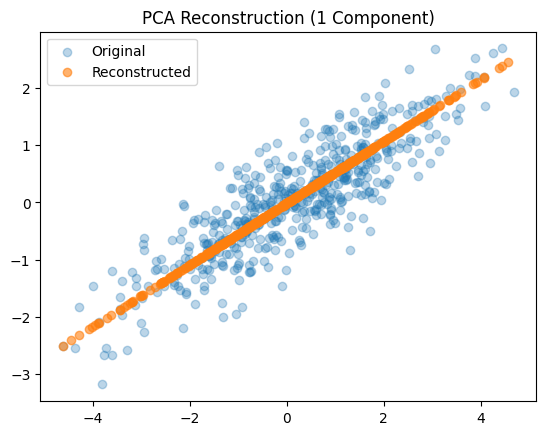

In [ ]:
pca_recon = PCA(n_components=1)
X_reduced = pca_recon.fit_transform(X)
X_reconstructed = ?  # TODO: 7. complete at the question mark

plt.scatter(X[:, 0], X[:, 1], alpha=0.3, label='Original')
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], alpha=0.6, label='Reconstructed')
plt.legend()
plt.title("PCA Reconstruction (1 Component)")
plt.show()

## k-means

### Clustering

> 1. Is clustering a supervised or an unsupervised learning problem?
> 2. Improve the points in the `centroids` variable below, such that the clusters visually look like they capture the data better to you! Give it just one shot, no need for perfection.

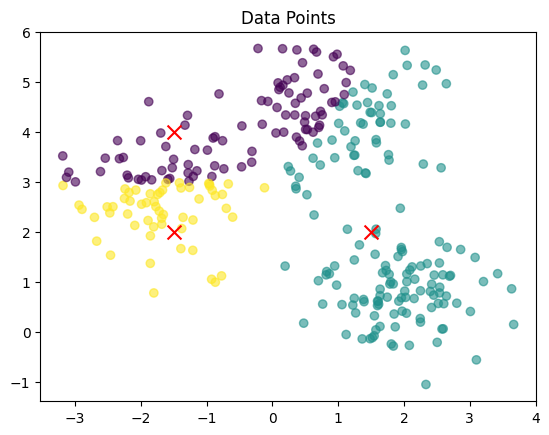

In [ ]:
from sklearn.datasets import make_blobs

X_blobs, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.7, random_state=0)

centroids = np.array([  # TODO: 2. these points seem a little off. Can you improve them?
    [-1.5, 4],
    [1.5, 2],
    [-1.5, 2]
])
labels = np.argmin(((X_blobs[:, None, :] - centroids[None, :, :])**2).sum(axis=2), axis=1)

plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100)
plt.title("Data Points")
plt.show()

### Optimization Target

Let's have a look at whether your new cluster definition is better that the one given. For that, we will have to define what makes a good clustering.

> 3. Implement the target function from the lecture in `clustering_cost`!

In [ ]:
def clustering_cost(X, centroids, labels):
    pass  # TODO: 3. implement

# Given centroids from the previous task
centroids_1 = np.array([[-1.5, 4], [1.5, 2], [-1.5, 2]])
labels_1 = np.argmin(((X_blobs[:, None, :] - centroids_1[None, :, :])**2).sum(axis=2), axis=1)

cost_1 = clustering_cost(X_blobs, centroids_1, labels_1)
print(f"Cost of given centroids: {cost_1:.2f}")
cost = clustering_cost(X_blobs, centroids, labels)
print(f"Cost of improved centroids: {cost:.2f}")

> 4. The defined points are called `centroids` in the code, but that is not correct. Why are they not actual centroids?

4. 

### Lloyd's Algorithm

> 5. How are the clusters initialized in the following implementation of k-means? Was it the same in the lecture?
> 6. Look up the k-means documentation of sklearn. What other options are there for initialization?
> 7. Complete the following implementation of the k-means clustering algorithm from the lecture!

5. 
6. 

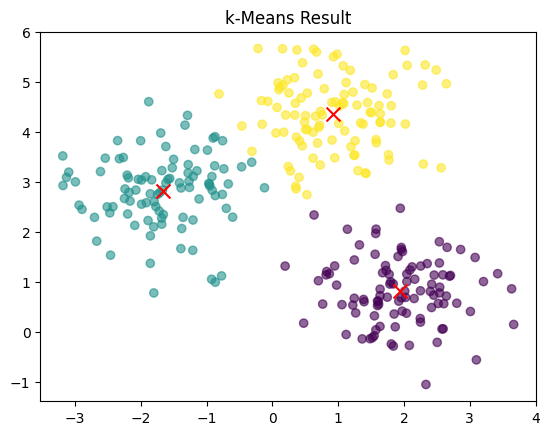

In [ ]:
def kmeans(X, k=3, n_iter=10):
    centroids = X[np.random.choice(len(X), k, replace=False)]
    
    for _ in range(n_iter):
        labels = ?(((X[:, None, :] - centroids[None, :, :])**2).sum(axis=2), axis=1)  # TODO: 7. complete (insert a function) at the question mark
        centroids = np.array([X[labels == j].? for j in range(k)])  # TODO: 7. complete (insert a function) at the question mark
    
    return centroids, labels

centroids, labels = kmeans(X_blobs, k=3, n_iter=10)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100)
plt.title("k-Means Result")
plt.show()

### Connection to PCA

> 7. Run the following code cells a couple of times. What do you notice in the clusters, in case two centroids share on of the blobs?

7. 

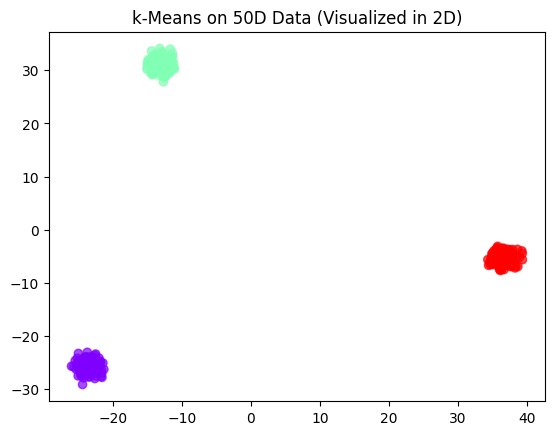

In [ ]:
X_high, _ = make_blobs(n_samples=500, centers=3, n_features=50, random_state=42)
centroids_high, labels_high = kmeans(X_high, k=3)
X_vis = PCA(n_components=2).fit_transform(X_high)

plt.scatter(X_vis[:,0], X_vis[:,1], c=labels_high, cmap='rainbow', alpha=0.7)
plt.title("k-Means on 50D Data (Visualized in 2D)")
plt.show()

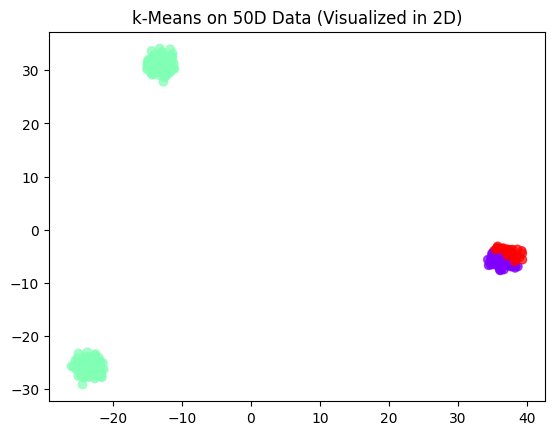

In [ ]:
X_vis = PCA(n_components=2).fit_transform(X_high)

centroids_low, labels_low = kmeans(X_vis, k=3)
plt.scatter(X_vis[:,0], X_vis[:,1], c=labels_low, cmap='rainbow', alpha=0.7)
plt.title("k-Means on 50D Data (Visualized in 2D)")
plt.show()